In [4]:
import numpy as np
import pandas as pd
import random
%load_ext autoreload
%autoreload 2
import handle_categorical_vars
import handle_missing_values

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import os
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin/dot'
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# https://www.kaggle.com/competitions/titanic/data
titanic_train_df = pd.read_csv("./train.csv")
X = titanic_train_df.drop(["PassengerId", "Name", "Ticket", "Cabin", "Survived", "Embarked"], axis = 1)
y = titanic_train_df.loc[:, "Survived"]
X = handle_categorical_vars.one_hot_encode_column(X, "Sex", drop_first = True)
# X = handle_categorical_vars.one_hot_encode_column(X, "Embarked")
column_names = X.columns
X = handle_missing_values.impute_knn_algorithm(X, 3, False)
X = pd.DataFrame(X, columns = column_names)
# X["Survived"] = y
X.head()

FileNotFoundError: [Errno 2] No such file or directory: './train.csv'

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=2)
decision_tree_classifier.fit(X, y)
y_pred = decision_tree_classifier.predict(X)
print(f"The accuracy for the train set is {accuracy_score(y, y_pred)}")

In [16]:
dot_data = export_graphviz(decision_tree_classifier, out_file=None, filled=True, rounded = True, feature_names=X.columns, class_names=["0", "1"])
graph = graphviz.Source(dot_data)

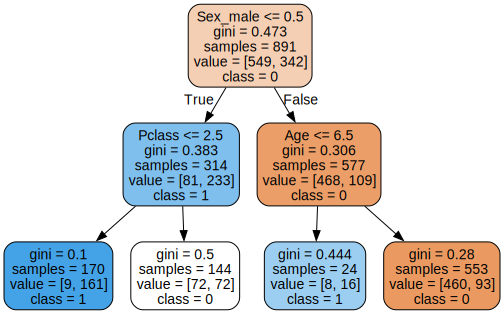

In [17]:
graph